https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/

In [3]:
import sklearn

print( sklearn.__version__ )

0.22


# I - Stacking for Classification

In [11]:
from sklearn.datasets import make_classification

In [12]:
X , y = make_classification( n_samples     = 1000 , 
                             n_features    = 20 ,
                             n_informative = 15 ,
                             n_redundant   = 5 ,
                             random_state  = 999 )

print( X.shape , y.shape )

(1000, 20) (1000,)


In [13]:
from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.svm import SVC

from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import StackingClassifier

In [14]:
def get_stacking():

    level0 = list()
    
    level0.append( ( 'lr' , LogisticRegression() ) )
    level0.append( ( 'knn' , KNeighborsClassifier() ) )
    level0.append( ( 'cart', DecisionTreeClassifier() ) )
    level0.append( ( 'svm' , SVC() ) )
    level0.append( ( 'bayes' , GaussianNB() ) )
    
    level1 = LogisticRegression()
    
    model = StackingClassifier( estimators      = level0 , 
                                final_estimator = level1 , 
                                cv              = 5 )

    return model

In [61]:
def get_models() :
    
    models = dict()
    
    models[ 'lr' ]       = LogisticRegression()
    models[ 'knn' ]      = KNeighborsClassifier()
    models[ 'cart' ]     = DecisionTreeClassifier()
    models[ 'svm' ]      = SVC()
    models[ 'bayes' ]    = GaussianNB()
    
    models[ 'stacking' ] = get_stacking()

    return models

In [62]:
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.model_selection import cross_val_score

In [63]:
def evaluate_model( model ):
    
    cv = RepeatedStratifiedKFold( n_splits = 10 , n_repeats = 3 , random_state = 999 )

    scores = cross_val_score( model , X , y , scoring = 'accuracy' , cv = cv , n_jobs = -1 , error_score = 'raise' )

    return scores

<b>Modèles niveau 0 ( base models ):</b>

 - KNeighborsClassifier
 - DecisionTreeClassifier
 - SVC
 - GaussianNB
 
<b>Modèle niveau 1 ( meta learner model ) :</b>
 
 - LogisticRegression

In [64]:
from numpy import mean

from numpy import std

In [76]:
a = 12.3

f'{a:.2f}'

'12.30'

In [77]:
models = get_models()

results = list()

names = list()

for name , model in models.items() :
    
    scores = evaluate_model( model )
    
    print( f'{name} : {mean( scores ):.3f} ( {std( scores ):.3f} )' )
    
    names.append( name )
    results.append( scores )

lr : 0.744 ( 0.044 )
knn : 0.876 ( 0.032 )
cart : 0.758 ( 0.035 )
svm : 0.902 ( 0.029 )
bayes : 0.715 ( 0.046 )
stacking : 0.912 ( 0.028 )


In [66]:
from matplotlib import pyplot

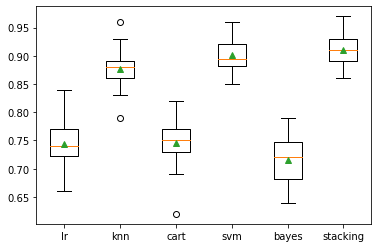

In [72]:
pyplot.boxplot( results , labels = names , showmeans = True )

pyplot.show()

Conclusion : le modèle stack est légèrement meilleur que le modèle SVM.

# II - Stacking for Regression

In [78]:
from sklearn.datasets import make_regression

In [80]:
X , y = make_regression( n_samples       = 1000 , 
                         n_features      = 20 ,
                         n_informative   = 15 ,
                         noise           = 0.1 ,
                         random_state    = 1 )

print( X.shape , y.shape )

(1000, 20) (1000,)


In [81]:
from sklearn.neighbors import KNeighborsRegressor

from sklearn.tree import DecisionTreeRegressor

from sklearn.svm import SVR

from sklearn.linear_model import LinearRegression

from sklearn.ensemble import StackingRegressor

In [102]:
def get_stacking():

    level0 = list()
    
    level0.append( ( 'knn' , KNeighborsRegressor() ) )
    level0.append( ( 'cart' , DecisionTreeRegressor() ) )
    level0.append( ( 'svm' , SVR() ) )

    level1 = LinearRegression()

    model = StackingRegressor( estimators = level0 , final_estimator = level1 , cv = 5 , passthrough = False ) # cv = 5 ??

    return model

In [103]:
def get_models():

    models = dict()

    models[ 'knn' ]      = KNeighborsRegressor()
    models[ 'cart' ]     = DecisionTreeRegressor()
    models[ 'svm' ]      = SVR()
    
    models[ 'stacking' ] = get_stacking()

    return models

In [104]:
from sklearn.model_selection import RepeatedKFold

from sklearn.model_selection import cross_val_score

In [105]:
def evaluate_model( model ) :

    cv = RepeatedKFold( n_splits = 10 , n_repeats = 3 , random_state = 1 )

    scores = cross_val_score( model , X , y , scoring = 'neg_mean_absolute_error' , cv = cv , n_jobs = -1 , error_score = 'raise' )

    return scores

In [106]:
models = get_models()

results = list()

names = list()

for name , model in models.items() :
    
    scores = evaluate_model( model )
    
    print( f'{name} : {mean( scores ):.2f} ( {std( scores ):.2f} )' )
    
    names.append( name )
    results.append( scores )

knn : -101.02 ( 7.16 )
cart : -148.41 ( 10.85 )
svm : -162.42 ( 12.56 )
stacking : -56.72 ( 5.15 )


In [107]:
from matplotlib import pyplot

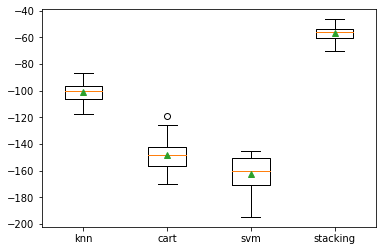

In [108]:
pyplot.boxplot( results , labels = names , showmeans = True )

pyplot.show()

Conclusion : le modèle stack est légèrement meilleur que le modèle SVM.

## Compléments :

Si on souhaite ajouter les données de base en input du modèle stack : StackingRegressor( ... , passthrough = True )